In [1]:
## Importamos paquetes
import numpy as np
from scipy.integrate import solve_ivp

## Paquetes para graficar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Parámetros para graficar
sns.set_style('darkgrid')
sns.set_context('talk')

## Definimos colores
BLUE = '#1f77b4'
ORANGE = '#ff7f0e'
GREEN = '#2ca02c'

In [2]:
## Definimos la ecuación a integrar
def logistic(t, y, *args):
  tau, El, R, Ie = args
  dydt = (1/tau)*(El-y+R*Ie)
  return dydt

## Parámetros de integración
h  = 0.05e-3                          ## Paso temporal 
t0 = 0                             ## Tiempo inicial
tf = 200e-3                           ## Tiempo final
t_span = (t0, tf)                  ## Intervalo temporal

## Instantes donde evaluar la solución.
t_eval = np.arange(t0, tf, h) 

## Parámetros de la función
tau = 10e-3
El = -65e-3
R = 10e6
Ie = 2e-9
args = (tau, El, R, Ie)

## Condición inicial.
## Observación: solve_ivp requiere que el parámetro y0 sea "de tipo array".
## Esto quiere decir que, por más que estemos resolviendo un sistema
## unidimensional, no podemos definir y0 = 'valor', sino que  es necesario 
## definir y0 como un vector de un elemento.
## Una forma de hacer esto es utilizar una tupla, como hacemos a continuación
y0 = (-65e-3,)                       

## Integramos la solución
sol = solve_ivp(
    logistic, 
    t_span=t_span, 
    y0=y0, 
    t_eval=t_eval, 
    args=args,
    method='RK45' ## Resolvemos utilizando el método de Runge-Kutta de orden 4
)

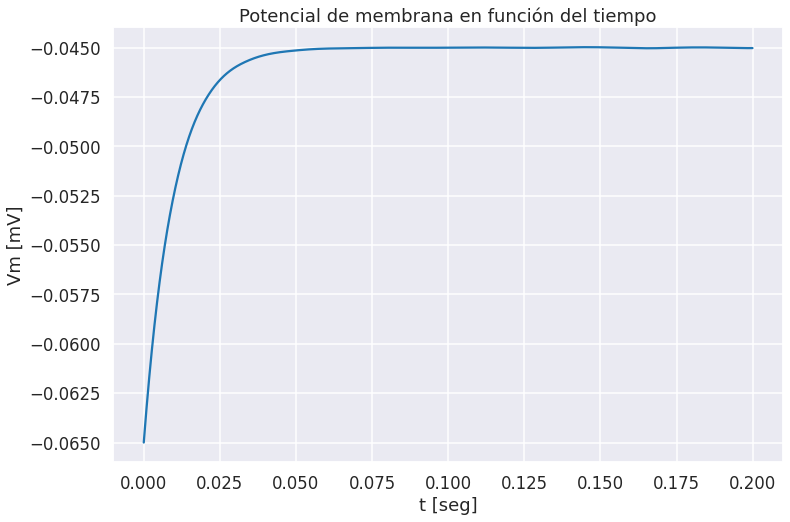

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Potencial de membrana en función del tiempo')
ax.set_ylabel('Vm [mV]')
ax.set_xlabel('t [seg]')
ax.plot(sol.t, sol.y[0])
plt.show()

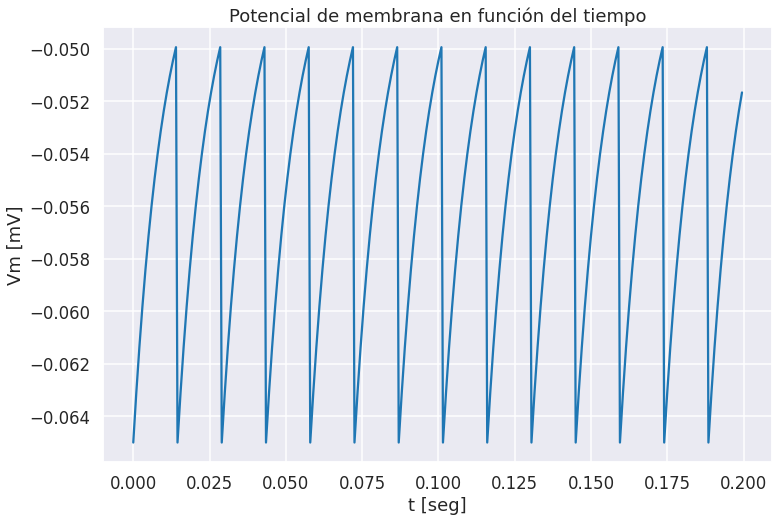

In [44]:
t = np.arange(0,200e-3,0.5e-3)
tau = 10e-3;El = -65e-3;R = 10e6
Ie = 2e-9;v0 = -65e-3;Vth = -50e-3
v = El + R * Ie + (v0 - El - R * Ie) * np.power(np.e, -t/tau)

i = 0;j = 0
t_final = t[i]
v_final = np.zeros(v.size)
while t_final<t[t.size-1]:
  t_final = t[i]
  v_final[i] = v[j]
  #print("i= {}. j= {}. t_final= {}. v_final= {}. t[i]= {}. v[j]= {}.".format(i, j, t_final, v_final[i], t[i], v[j]))
  if v_final[i]<Vth:
    j += 1
  else:
    j=0
  i += 1
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Potencial de membrana en función del tiempo')
ax.set_ylabel('Vm [mV]')
ax.set_xlabel('t [seg]')
plt.plot(t,v_final)

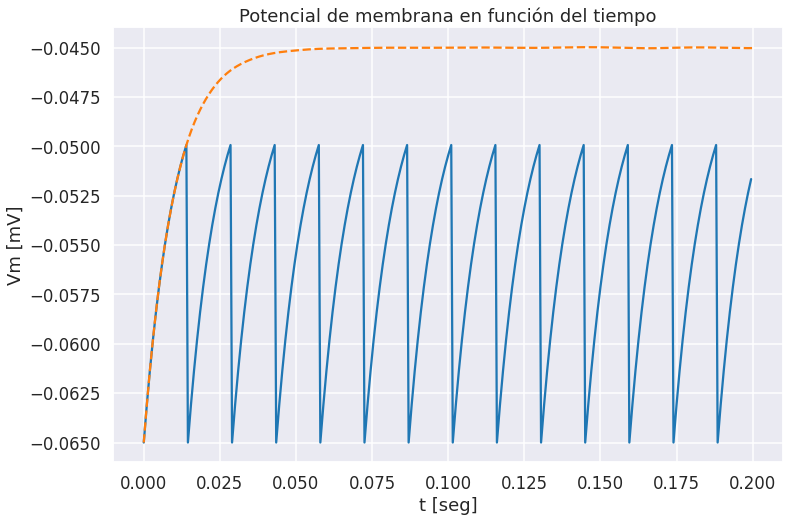

In [45]:
## Graficamos las soluciones
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t,v_final)
ax.plot(sol.t, sol.y[0], '--')
ax.set_title('Potencial de membrana en función del tiempo')
ax.set_ylabel('Vm [mV]')
ax.set_xlabel('t [seg]')
plt.show()

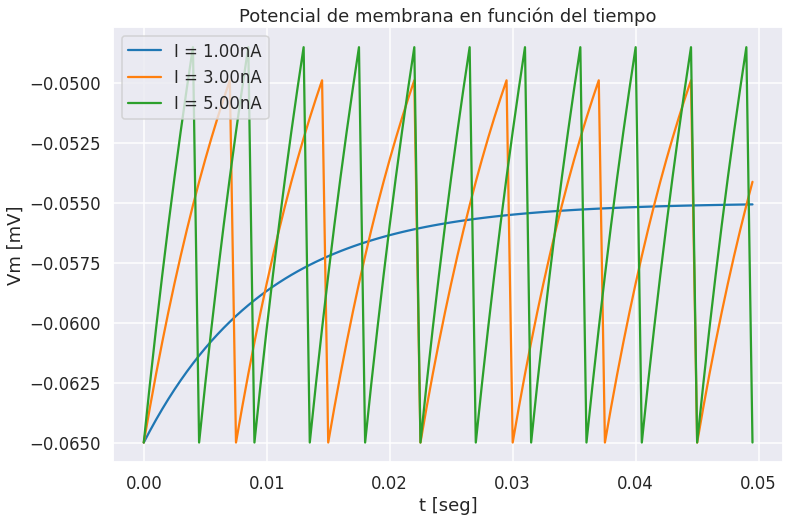

In [50]:
h = 0.5e-3
t_ini = 0
t_fin = 50e-3
t = np.arange(t_ini,t_fin,h)
tau = 10e-3
El = -65e-3
R = 10e6
v0 = -65e-3
Vth = -50e-3

fig, ax = plt.subplots(figsize=(12, 8))
Ie_values = np.arange(1e-9, 7e-9, 2e-9)
w = np.zeros(Ie_values.size)
for k, Ie in enumerate(Ie_values):
  v = El + R * Ie + (v0 - El - R * Ie) * np.power(np.e, -t/tau)
  i = 0
  j = 0
  t_final = t[i]
  v_final = np.zeros(v.size)
  while t_final<t[t.size-1]:
    t_final = t[i]
    v_final[i] = v[j]
    #print("i= {}. j= {}. t_final= {}. v_final= {}. t[i]= {}. v[j]= {}.".format(i, j, t_final, v_final[i], t[i], v[j]))
    if v_final[i]<Vth:
      j += 1
    else:
      w[k]= 1/t[j]
      j=0
    i += 1

  ax.plot(t,v_final,label='I = {:1.2f}nA'.format(Ie*1000000000))

plt.legend()
ax.set_title('Potencial de membrana en función del tiempo')
ax.set_ylabel('Vm [mV]')
ax.set_xlabel('t [seg]')
plt.show()

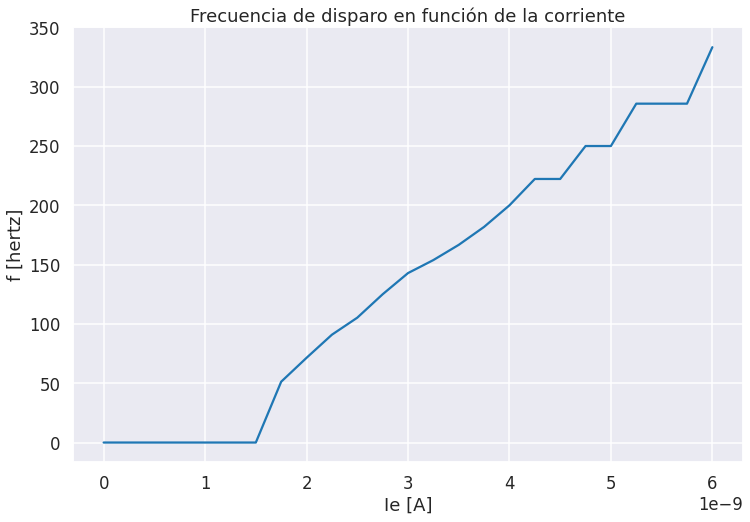

In [65]:
h = 0.5e-3
t_ini = 0
t_fin = 20e-3
t = np.arange(t_ini,t_fin,h)
tau = 10e-3
El = -65e-3
R = 10e6
v0 = -65e-3
Vth = -50e-3

Ie_values = np.arange(0, 6.25e-9, 0.25e-9)
w = np.zeros(Ie_values.size)
for k, Ie in enumerate(Ie_values):
  v = El + R * Ie + (v0 - El - R * Ie) * np.power(np.e, -t/tau)
  i = 0
  j = 0
  t_final = t[i]
  v_final = np.zeros(v.size)
  while t_final<t[t.size-1]:
    t_final = t[i]
    v_final[i] = v[j]
    #print("i= {}. j= {}. t_final= {}. v_final= {}. t[i]= {}. v[j]= {}.".format(i, j, t_final, v_final[i], t[i], v[j]))
    if v_final[i]<Vth:
      j += 1
    else:
      w[k]= 1/t[j]
      j=0
    i += 1

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Frecuencia de disparo en función de la corriente')
ax.set_ylabel('f [hertz]')
ax.set_xlabel('Ie [A]')
plt.plot(Ie_values, w)
plt.show()

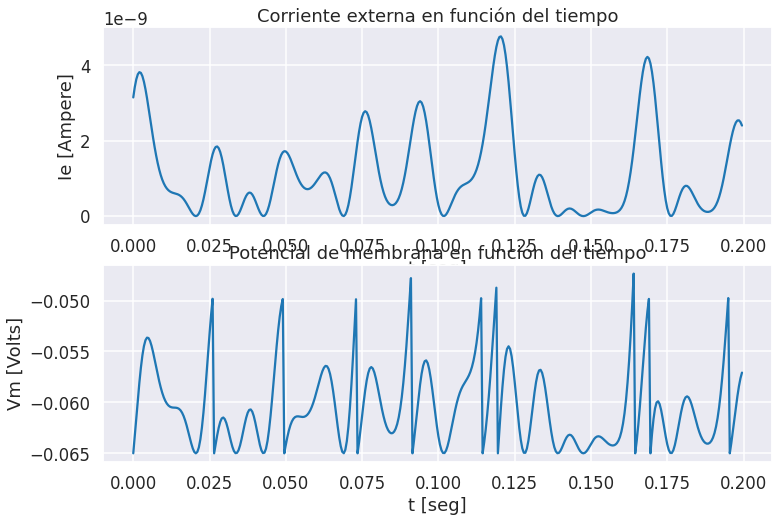

In [76]:
t = np.arange(0,200e-3,0.5e-3)
tau = 10e-3;El = -65e-3;R = 10e6
v0 = -65e-3;Vth = -50e-3
Ie = np.power(np.cos(t/3e-3)+np.sin(t/5e-3)+np.cos(t/7e-3)+np.sin(t/11e-3)+np.cos(t/13e-3),2)*0.35e-9
v = El + R * Ie + (v0 - El - R * Ie) * np.power(np.e, -t/tau)

i = 0;j = 0
t_final = t[i]
v_final = np.zeros(v.size)
while t_final<t[t.size-1]:
  t_final = t[i]
  #v_final[i] = v[j]
  v_final[i] = El + R * Ie[i] + (v0 - El - R * Ie[i]) * np.power(np.e, -t[j]/tau)
  if v_final[i]<Vth:
    j += 1
  else:
    j=0
  i += 1

fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(t, Ie)
axs[0].set_title('Corriente externa en función del tiempo')
axs[0].set_ylabel('Ie [Ampere]')
axs[0].set_xlabel('t [seg]')
axs[1].plot(t, v_final)
axs[1].set_title('Potencial de membrana en función del tiempo')
axs[1].set_ylabel('Vm [Volts]')
axs[1].set_xlabel('t [seg]')
plt.show()